In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier as cat
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, plot_roc_curve, confusion_matrix

ModuleNotFoundError: No module named 'catboost'

In [7]:
# Loading the data set into a pandas data frame

df=pd.read_csv('Train-Test-Telco-Customer-Retention.csv')

print(os.listdir("./"))


['data_preprocess.ipynb', '.DS_Store', 'LICENSE', 'NewData-Telco-Customer-Retention.csv', 'data_clean.ipynb', 'Train-Test-Telco-Customer-Retention.csv', 'README.md', '.gitignore', '.git', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7000 non-null   object 
 1   gender            7000 non-null   object 
 2   SeniorCitizen     7000 non-null   int64  
 3   Partner           7000 non-null   object 
 4   Dependents        7000 non-null   object 
 5   tenure            7000 non-null   int64  
 6   PhoneService      7000 non-null   object 
 7   MultipleLines     7000 non-null   object 
 8   InternetService   7000 non-null   object 
 9   OnlineSecurity    7000 non-null   object 
 10  OnlineBackup      7000 non-null   object 
 11  DeviceProtection  7000 non-null   object 
 12  TechSupport       7000 non-null   object 
 13  StreamingTV       7000 non-null   object 
 14  StreamingMovies   7000 non-null   object 
 15  Contract          7000 non-null   object 
 16  PaperlessBilling  7000 non-null   object 


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [10]:
# Checking the unique values

for col in df:
    print('\n',col,': ', df[col].unique())


 customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 gender :  ['Female' 'Male']

 SeniorCitizen :  [0 1]

 Partner :  ['Yes' 'No']

 Dependents :  ['No' 'Yes']

 tenure :  [ 1 34  2 45 28 62 13 16 58 49 25 69 52 71 10 21 12 30 47 72 17 27  5 46
 11 70 63 43 15  8 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32
 55 37 36 41  6  4 33 67 23 57 61 14 22 20 53 40 59 24 44 19 54 51 26 39
  0]

 PhoneService :  ['No' 'Yes']

 MultipleLines :  ['No phone service' 'No' 'Yes']

 InternetService :  ['DSL' 'Fiber optic' 'No']

 OnlineSecurity :  ['No' 'Yes' 'No internet service']

 OnlineBackup :  ['Yes' 'No' 'No internet service']

 DeviceProtection :  ['No' 'Yes' 'No internet service']

 TechSupport :  ['No' 'Yes' 'No internet service']

 StreamingTV :  ['No' 'Yes' 'No internet service']

 StreamingMovies :  ['No' 'Yes' 'No internet service']

 Contract :  ['Month-to-month' 'One year' 'Two year']

 PaperlessBilling :  ['Yes' 'No']

 Paymen

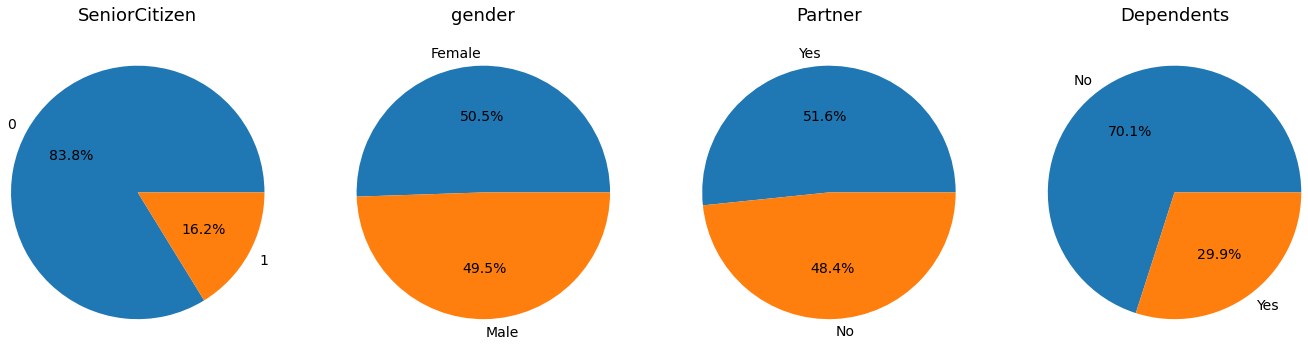

In [11]:
# Illustrating the values and count of attributes using plots:

label_SenCit = df['SeniorCitizen'].unique()
value_SenCit = df['SeniorCitizen'].value_counts() / len(df) * 100

label_gen = df['gender'].unique()
value_gen = df['gender'].value_counts() / len(df) * 100

label_Part = df['Partner'].unique()
value_Part = df['Partner'].value_counts() / len(df) * 100

label_Dep = df['Dependents'].unique()
value_Dep = df['Dependents'].value_counts() / len(df) * 100

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.5, 0.5], aspect=2)
ax1.pie(value_SenCit, textprops={'size': 14}, autopct='%1.1f%%', labels=label_SenCit, radius = 2.2)

ax2 = fig.add_axes([0.8, 0, 0.5, 0.5], aspect=2)
ax2.pie(value_gen, textprops={'size': 14}, autopct='%1.1f%%', labels=label_gen, radius = 2.2)

ax3 = fig.add_axes([1.6, 0, 0.5, 0.5], aspect=2)
ax3.pie(value_Part, textprops={'size': 14}, autopct='%1.1f%%', labels=label_Part, radius = 2.2)

ax4 = fig.add_axes([2.4, 0, 0.5, 0.5], aspect=2)
ax4.pie(value_Dep, textprops={'size': 14}, autopct='%1.1f%%', labels=label_Dep, radius = 2.2)

ax1.set_title('SeniorCitizen', loc='center', pad = 100, fontdict={'fontsize':18})
ax2.set_title('gender', loc='center', pad = 100, fontdict={'fontsize':18})
ax3.set_title('Partner', loc='center', pad = 100, fontdict={'fontsize':18})
ax4.set_title('Dependents', loc='center', pad = 100, fontdict={'fontsize':18})

plt.show()

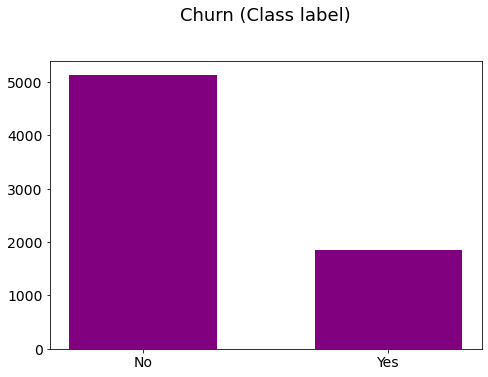

In [12]:
# Check the balance of class labels:

label_Churn = df['Churn'].unique()
value_Churn = df['Churn'].value_counts()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.bar(label_Churn, value_Churn, color= 'purple', width = 0.6)
ax.set_title('Churn (Class label)', loc='center', pad = 40, fontdict={'fontsize':18})
plt.show()

In [17]:

print('Count of null values:', df['TotalCharges'].isnull().sum())

Count of null values: 0


## Attribute Encoding

Most of the attributes of the data frame are categorical ones and need to be numeric values in order to be handled by many ML classifiers. LabelEncoding is an appropriate teqnique for such a transformation. LabelEncoding replaces categorical feature values with integers. Another solution is One-hot Encoding in which a categorical attribute is transformed to one or more binary attributes.

In [18]:
# LabelEncoding categorical columns:

cat_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Contract', 'PaymentMethod', "Churn"]

df[cat_col] = df[cat_col].apply(LabelEncoder().fit_transform)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7000 non-null   object 
 1   gender            7000 non-null   int64  
 2   SeniorCitizen     7000 non-null   int64  
 3   Partner           7000 non-null   int64  
 4   Dependents        7000 non-null   int64  
 5   tenure            7000 non-null   int64  
 6   PhoneService      7000 non-null   int64  
 7   MultipleLines     7000 non-null   int64  
 8   InternetService   7000 non-null   int64  
 9   OnlineSecurity    7000 non-null   int64  
 10  OnlineBackup      7000 non-null   int64  
 11  DeviceProtection  7000 non-null   int64  
 12  TechSupport       7000 non-null   int64  
 13  StreamingTV       7000 non-null   int64  
 14  StreamingMovies   7000 non-null   int64  
 15  Contract          7000 non-null   int64  
 16  PaperlessBilling  7000 non-null   int64  


### Feature Importance

Feature Importance is the (normalized) total reduction of the impurity criterion brought by that feature. The higher, the more important the feature.

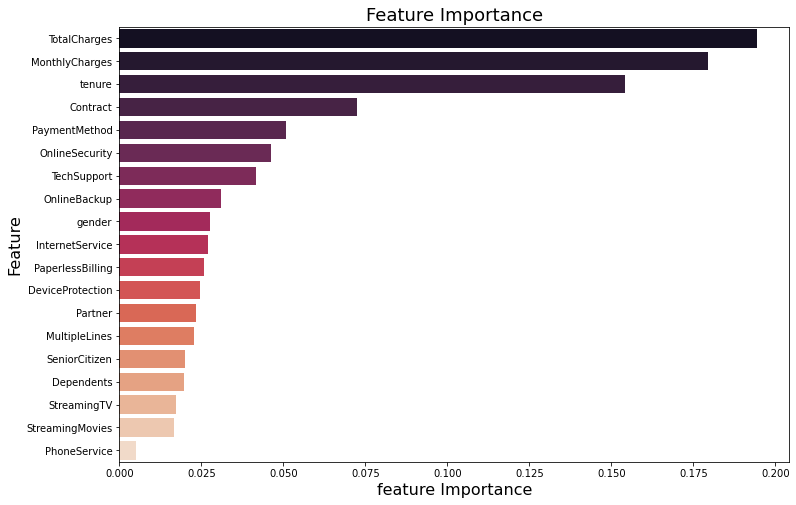

In [20]:
DTC = RandomForestClassifier(random_state=4)

X = df.drop(['Churn', 'customerID'] , axis=1)
Y = df['Churn']

feature_imp = DTC.fit(X, Y).feature_importances_
label_feature_imp = X.columns


sort_imp = pd.Series(data=feature_imp, index=label_feature_imp).sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.title("Feature Importance", fontsize=18)
ax = sns.barplot(y=sort_imp.index, x=sort_imp.values, palette="rocket", orient='h')
ax.set_xlabel('feature Importance',fontsize=16);
ax.set_ylabel('Feature',fontsize=16);
plt.show()

## Correlation

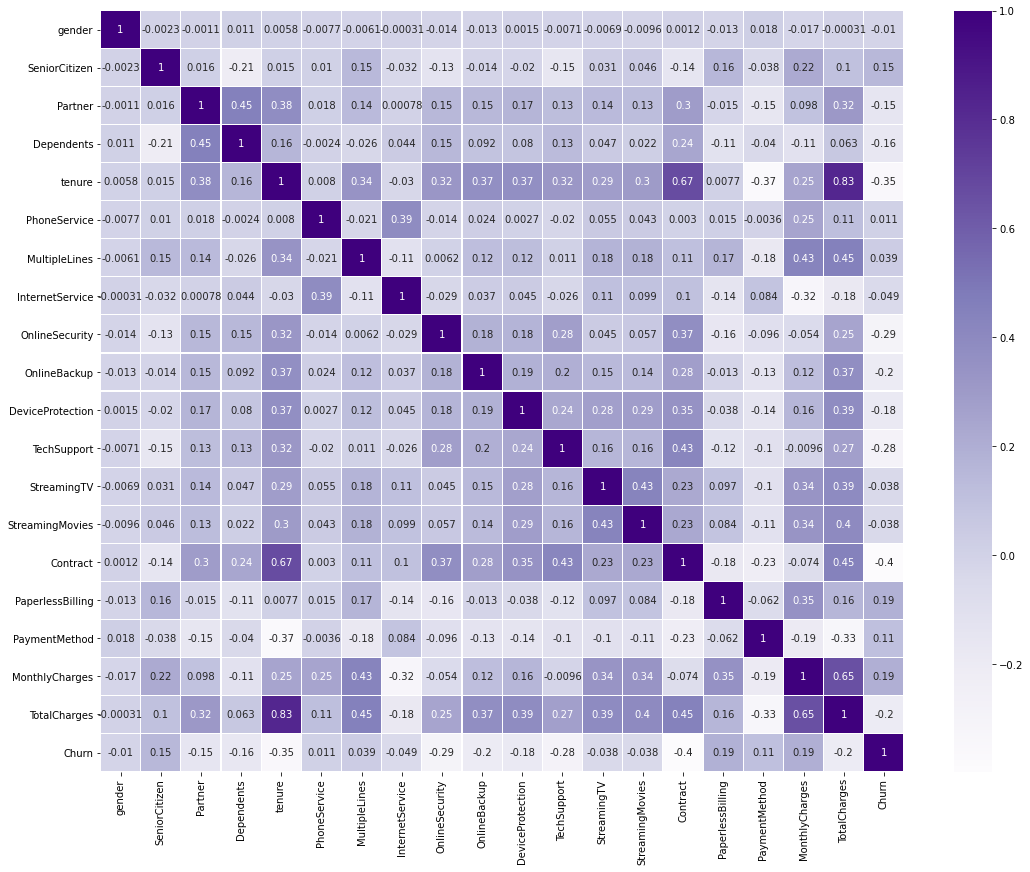

In [21]:
# check the correlation between the attributes
corrmat = df.corr()
f, ax = plt.subplots(figsize =(18, 14))
sns.heatmap(corrmat, ax = ax, cmap ="Purples", linewidths = 0.1, annot=True)
plt.show()

The strongest positive correlation is between tenure and TotalCharges which stands by 83%. tenure and Contract correlation get the next major share in our heatmap with 67%. Last but not least, correlation with share greater than 50% goes to TotalCharge and MonthlyCharges with 65%.